# 기능개발

## - 문제설명

프로그래머스 팀에서는 기능 개선 작업을 수행 중입니다. 각 기능은 진도가 100%일 때 서비스에 반영할 수 있습니다.

또, 각 기능의 개발속도는 모두 다르기 때문에 뒤에 있는 기능이 앞에 있는 기능보다 먼저 개발될 수 있고, 이때 뒤에 있는 기능은 앞에 있는 기능이 배포될 때 함께 배포됩니다.

먼저 배포되어야 하는 순서대로 작업의 진도가 적힌 정수 배열 progresses와 각 작업의 개발 속도가 적힌 정수 배열 speeds가 주어질 때 각 배포마다 몇 개의 기능이 배포되는지를 return 하도록 solution 함수를 완성하세요.

## - 제한사항

*  작업의 개수(progresses, speeds배열의 길이)는 100개 이하입니다.
*  작업 진도는 100 미만의 자연수입니다.
*  작업 속도는 100 이하의 자연수입니다.
*  배포는 하루에 한 번만 할 수 있으며, 하루의 끝에 이루어진다고 가정합니다. 예를 들어 진도율이 95%인 작업의 개발 속도가 하루에 4%라면 배포는 2일 뒤에 이루어집니다.

## - 입출력 예

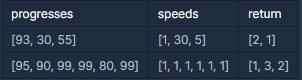


## - 입출력 예 설명

*  입출력 예 #1

첫 번째 기능은 93% 완료되어 있고 하루에 1%씩 작업이 가능하므로 7일간 작업 후 배포가 가능합니다.
두 번째 기능은 30%가 완료되어 있고 하루에 30%씩 작업이 가능하므로 3일간 작업 후 배포가 가능합니다. 하지만 이전 첫 번째 기능이 아직 완성된 상태가 아니기 때문에 첫 번째 기능이 배포되는 7일째 배포됩니다.
세 번째 기능은 55%가 완료되어 있고 하루에 5%씩 작업이 가능하므로 9일간 작업 후 배포가 가능합니다.

따라서 7일째에 2개의 기능, 9일째에 1개의 기능이 배포됩니다.

*  입출력 예 #2

모든 기능이 하루에 1%씩 작업이 가능하므로, 작업이 끝나기까지 남은 일수는 각각 5일, 10일, 1일, 1일, 20일, 1일입니다. 어떤 기능이 먼저 완성되었더라도 앞에 있는 모든 기능이 완성되지 않으면 배포가 불가능합니다.

따라서 5일째에 1개의 기능, 10일째에 3개의 기능, 20일째에 2개의 기능이 배포됩니다.


### 풀이 - Queue

일단 작업이 끝나기까지 남은 일수를 구하는 방법을 생각했다.
progresses와 speeds는 둘 다 같은 길이의 리스트라서 길이에 대해 range를 할까 생각을 했지만, 같은 길이 이므로 zip을 활용해서 풀면 더 쉬울 것 같다는 생각이 들었다.

남은 일수는 ((100 - 현재 작업 진도) / 개발속도) 이다.
그런데, 예를 들어 현재 작업 진도가 30, 개발 속도가 30일때 (100 - 30) / 30 을 하면 2.3333이 나온다. 그러면 배포 가능한 날짜는 3일이 되게 되는 것이다.
그래서 math의 ceil함수를 사용하여 올림을 해줌으로써 처리할 수 있다.

이제 answer에는 배포할 수 있는 날짜와 배포 가능한 기능의 개수를 넣어주고, 모든 연산을 마친 후에 answer의 기능 개수만 출력하면 된다.

In [7]:
def solution(progresses, speeds):
  import math
  answer = []
  for p, s in zip(progresses, speeds):
    day = math.ceil((100-p) / s)
    if not answer or answer[-1][0] < day:
      # 작업이 끝나기까지 남은 일수, 기능 개수
      answer.append([day, 1])
    else:
      answer[-1][1] += 1
  # answer에서의 기능 개수만 전달해주면 된다
  return [i[1] for i in answer]

print(solution([93, 30, 55], [1, 30, 5]))
print(solution([95, 90, 99, 99, 80, 99], [1,1,1,1,1,1]))

[2, 1]
[1, 3, 2]


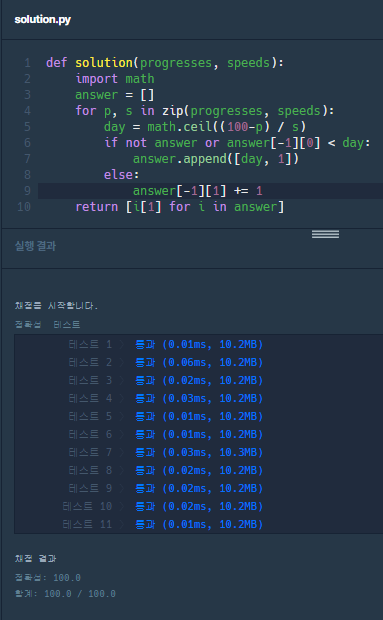

*  새로 알게된 점

나는 math의 ceil을 사용하여 올림을 함으로써 배포 가능한 날짜를 구하였는데, 이를 사용하지 않고 구할 수 있는 방법이 있다는 것을 알게 되었다.

예를 들어, 현재 작업 진도가 30, 개발 속도가 30이라면 math.ceil((100-30) / 30)을 하지 않고, (30 - 100) / 30을 하면 -2.33이 나오는데 이것을 내림을 해보자.
그러면 (30 - 100) // 30을 하면 -3이 나온다. 즉, 음수로 계산하여 내림을 하게 되면 절대값으로는 커지게 된다. 이것을 다시 - 해주면 3이 나오게 된다.

이렇게 math.ceil을 사용하지 않고 올림한 양수를 구할 수가 있다!